In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',  
                                             options=[
                                                 {'label': 'All Sites', 'value': 'ALL'},
                                                 {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                 {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                 {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                 {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                             ],
                                             value='ALL',
                                             placeholder="Select a Launch Site here",
                                             searchable=True
                                ),
                                             
        
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
                                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
        names='Launch Site', 
        title='Total success launches by site')
        return fig
    else:
        # return the outcomes piechart for a selected site
        launch_df = filtered_df[filtered_df['Launch Site']==entered_site]
        success_count = launch_df[launch_df['class'] == 1]['class'].count()
        failed_count = launch_df[launch_df['class'] == 0]['class'].count()
        fig = px.pie(launch_df, values=[success_count, failed_count], 
        names=['Success', 'Failed'], 
        title='Total success launches by site ' + entered_site)
        return fig



# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'), 
               Input(component_id="payload-slider", component_property="value")])
def get_scatter_plot(entered_site, payload_value):
    low, high = payload_value
    if entered_site == 'ALL':
        mask = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
        fig = px.scatter(spacex_df[mask], x="Payload Mass (kg)", y="class", color="Booster Version Category",
        title='Correlation Between Payload And Success for all sites')
        return fig
    else:
        launch_df = spacex_df[spacex_df['Launch Site']==entered_site]
        mask = (launch_df['Payload Mass (kg)'] > low) & (launch_df['Payload Mass (kg)'] < high)
        fig = px.scatter(launch_df[mask], x="Payload Mass (kg)", y="class", color="Booster Version Category",
        title='Correlation Between Payload And Success for site ' + entered_site)
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server()


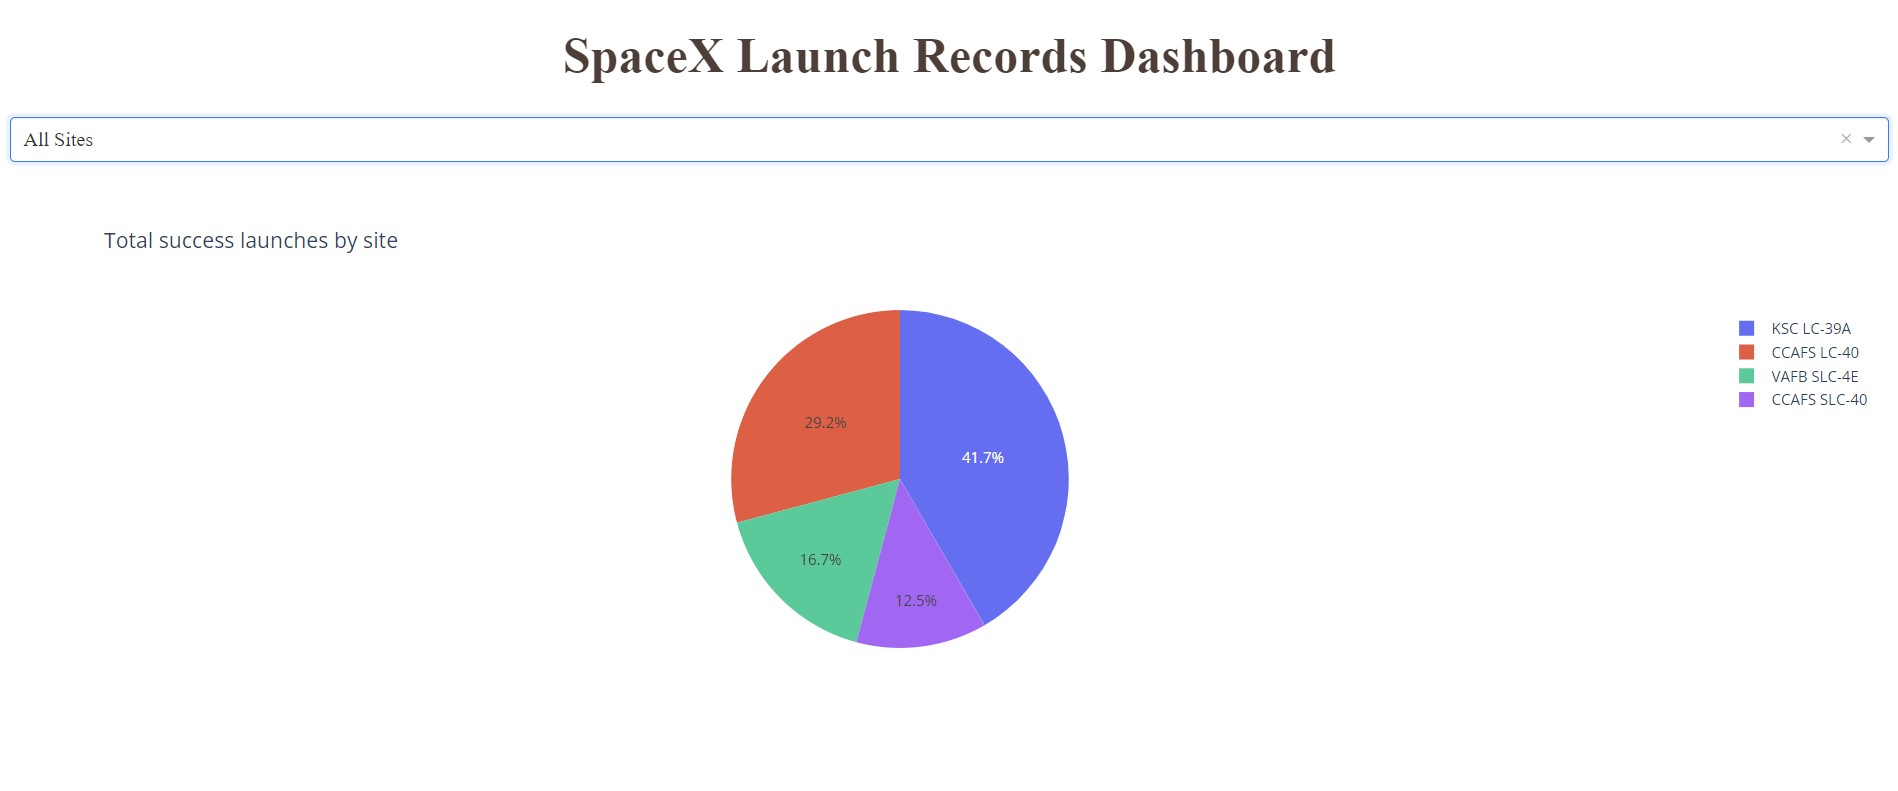

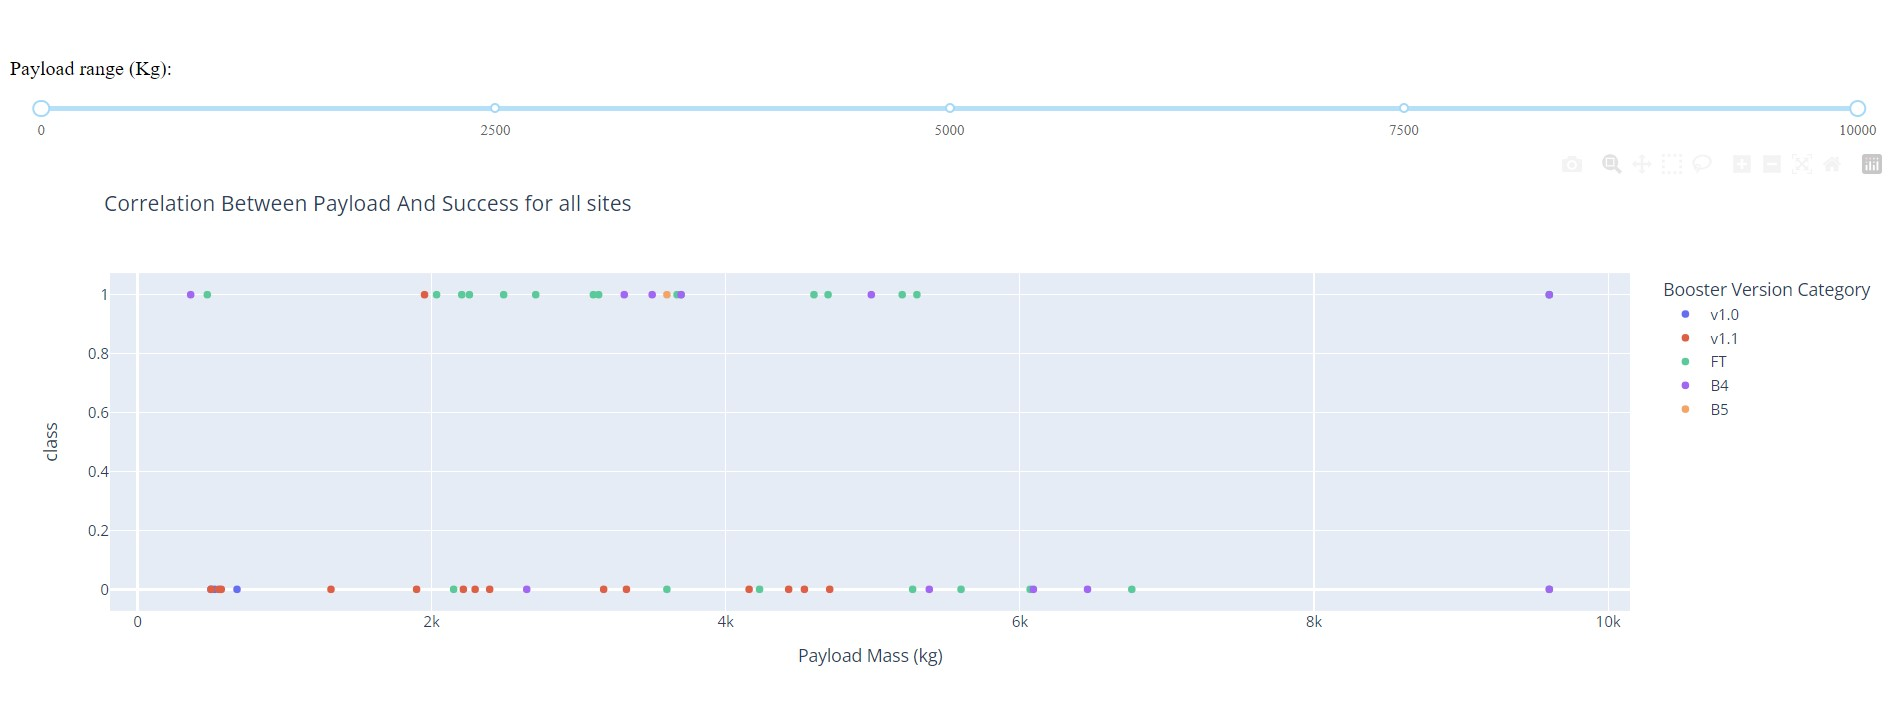

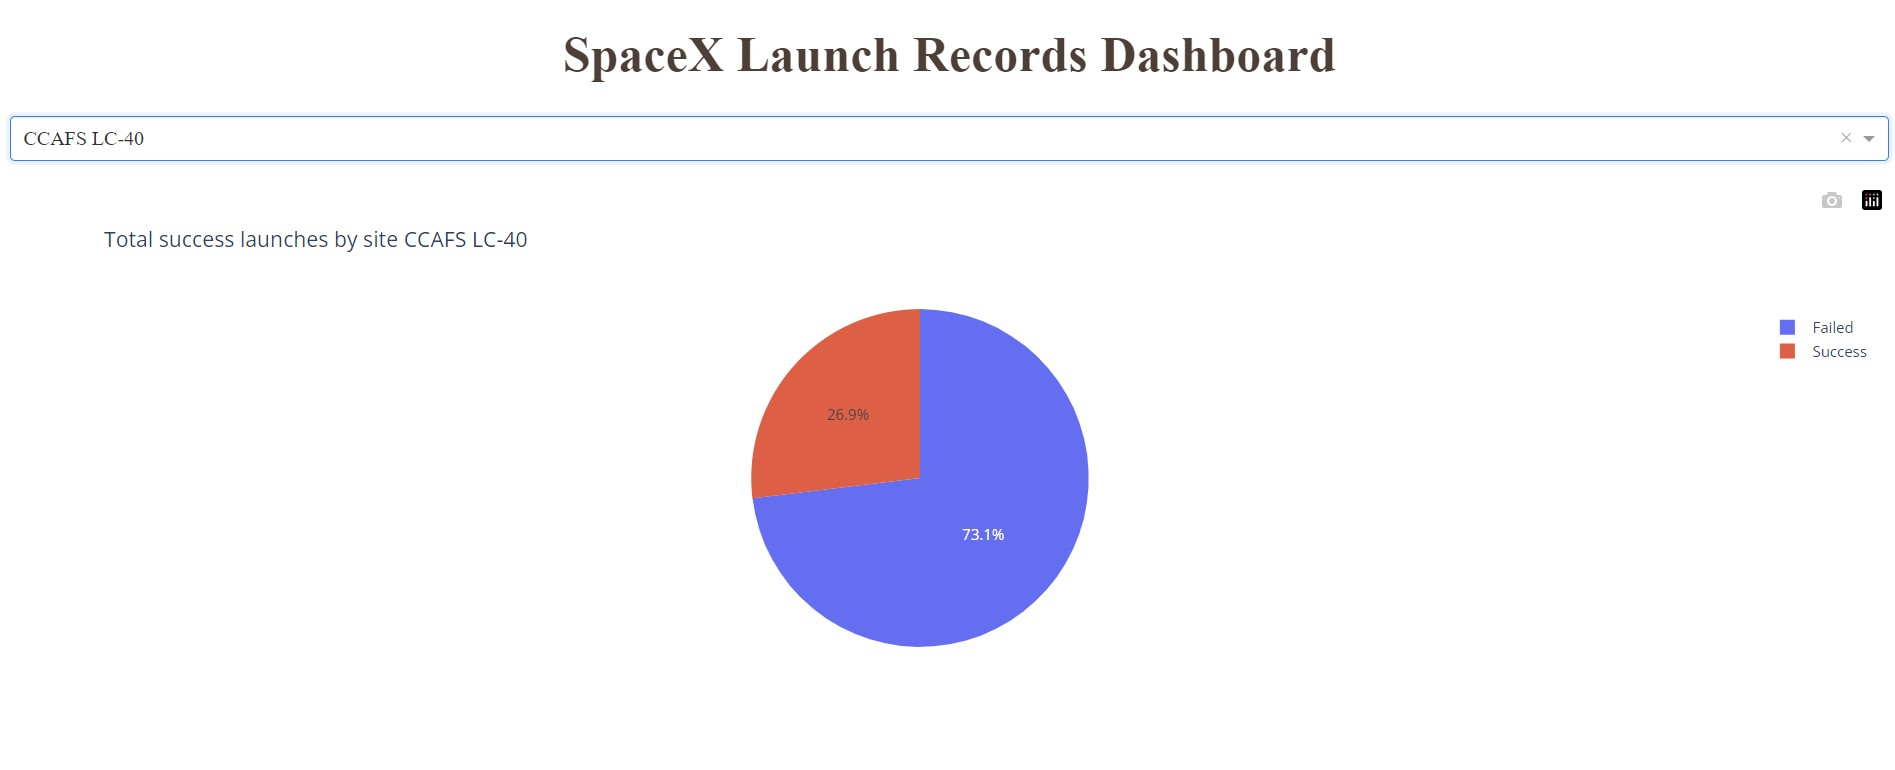

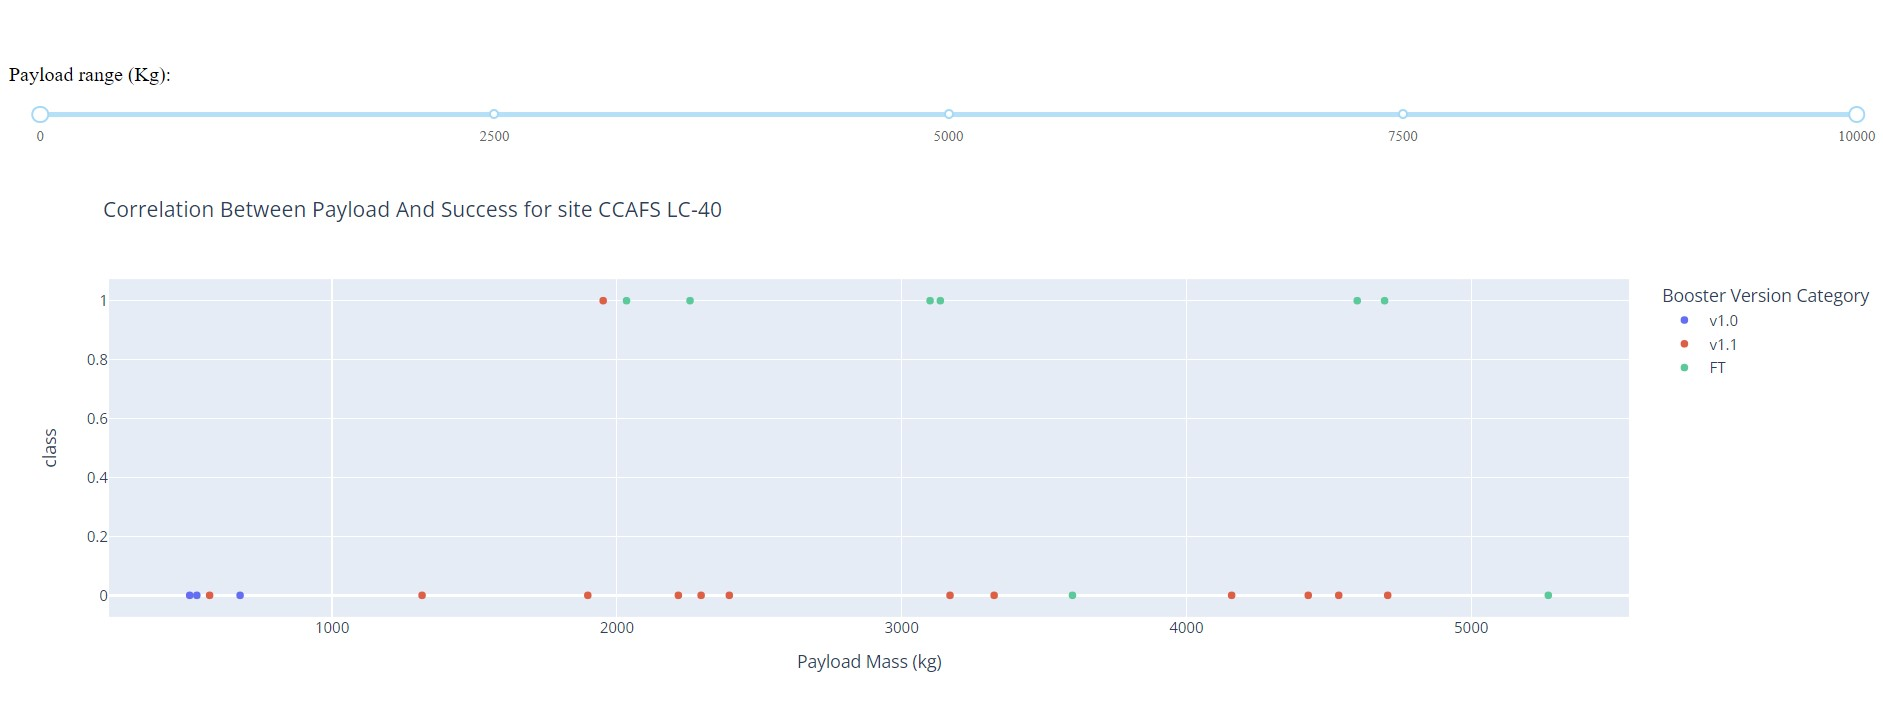

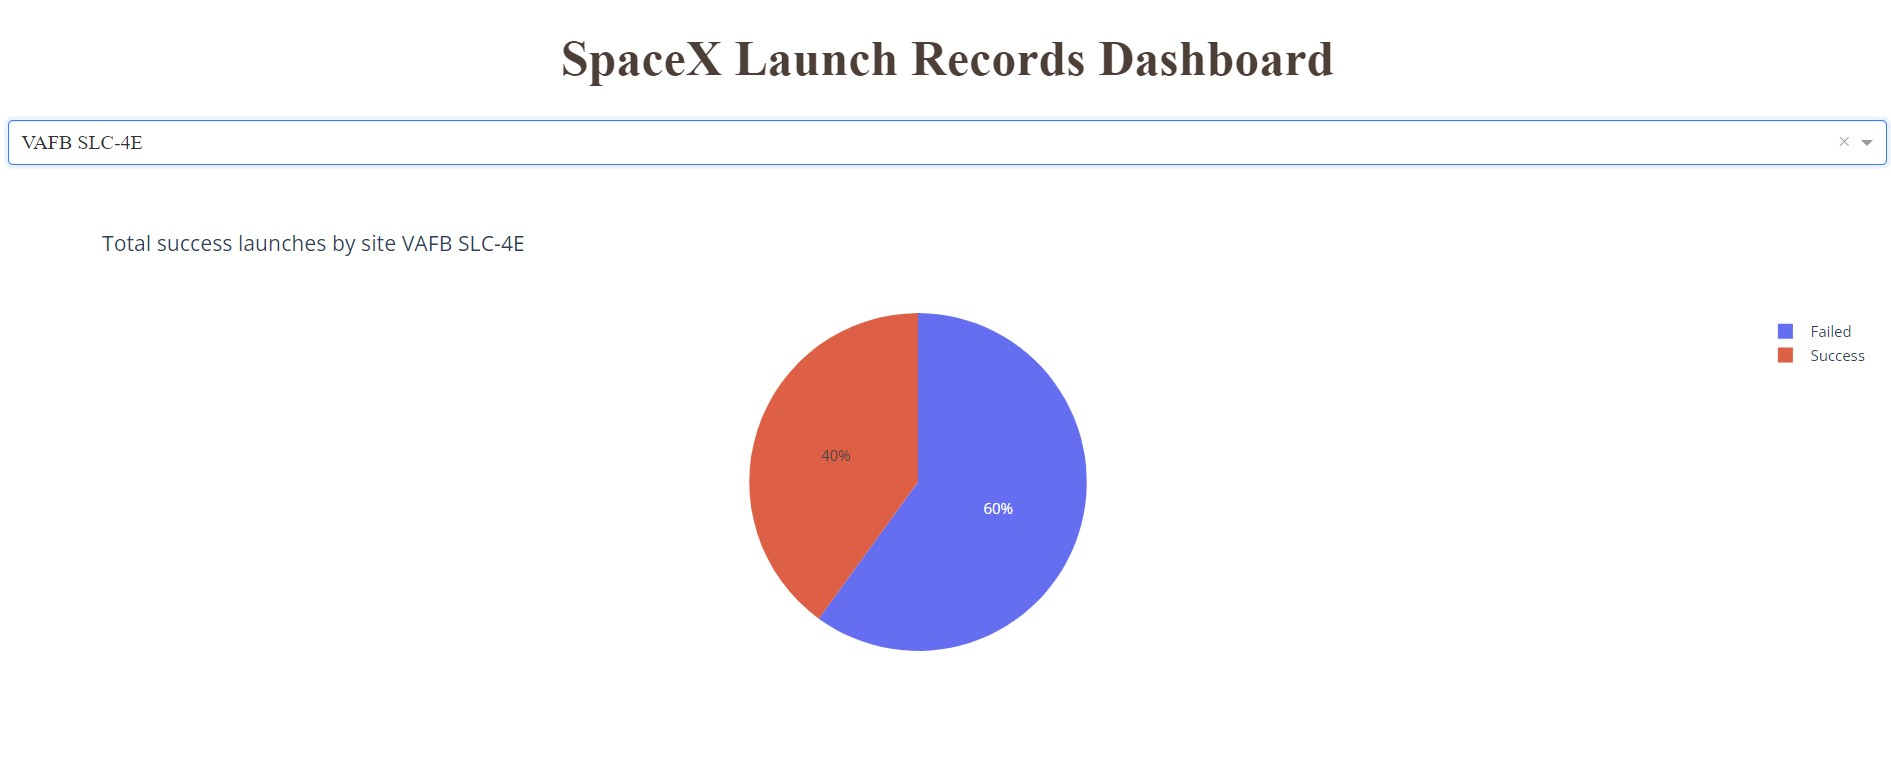

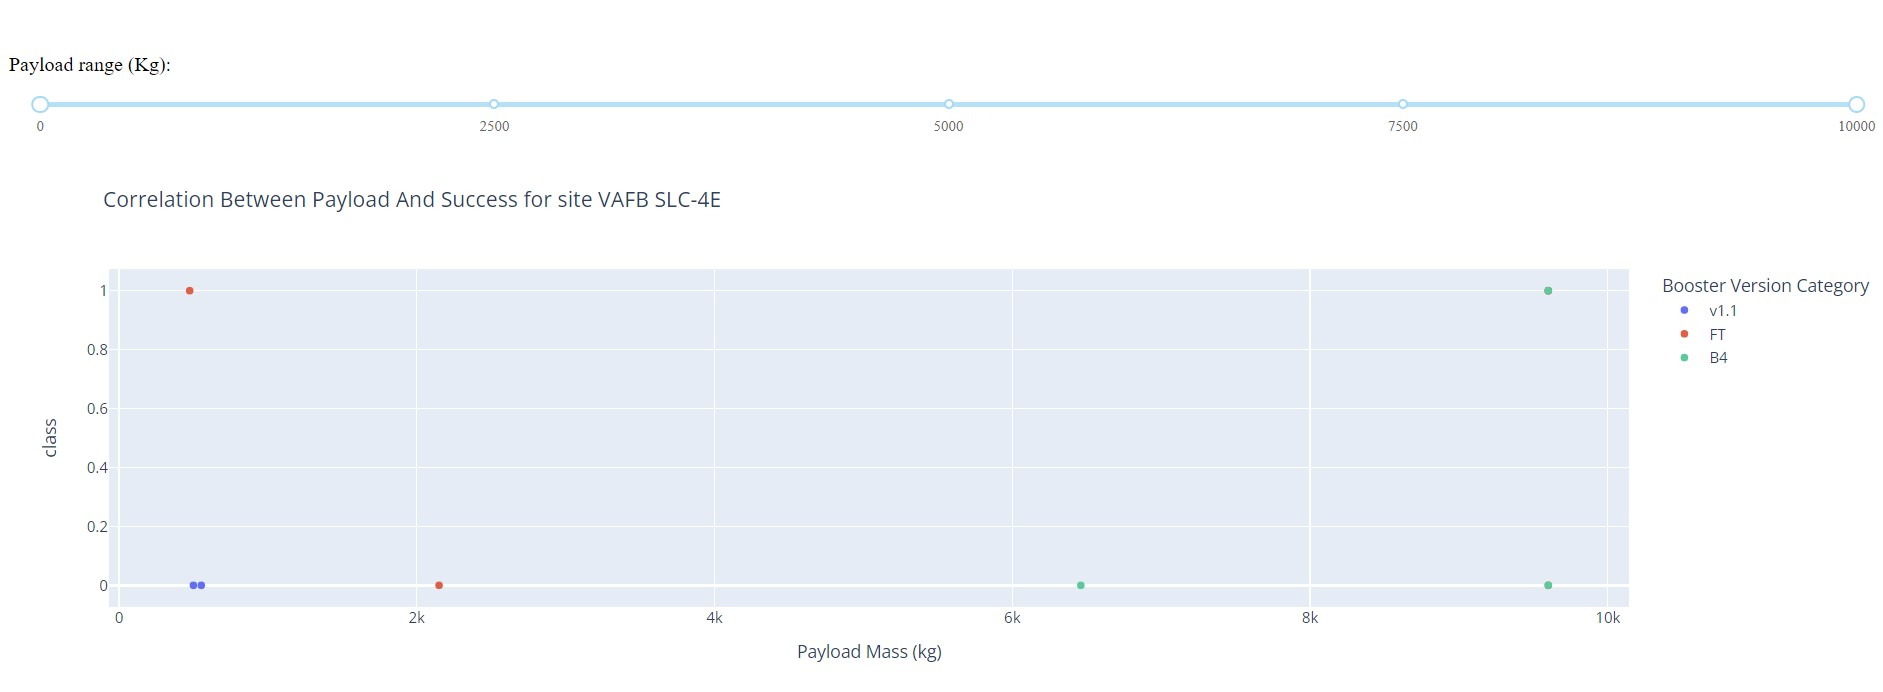

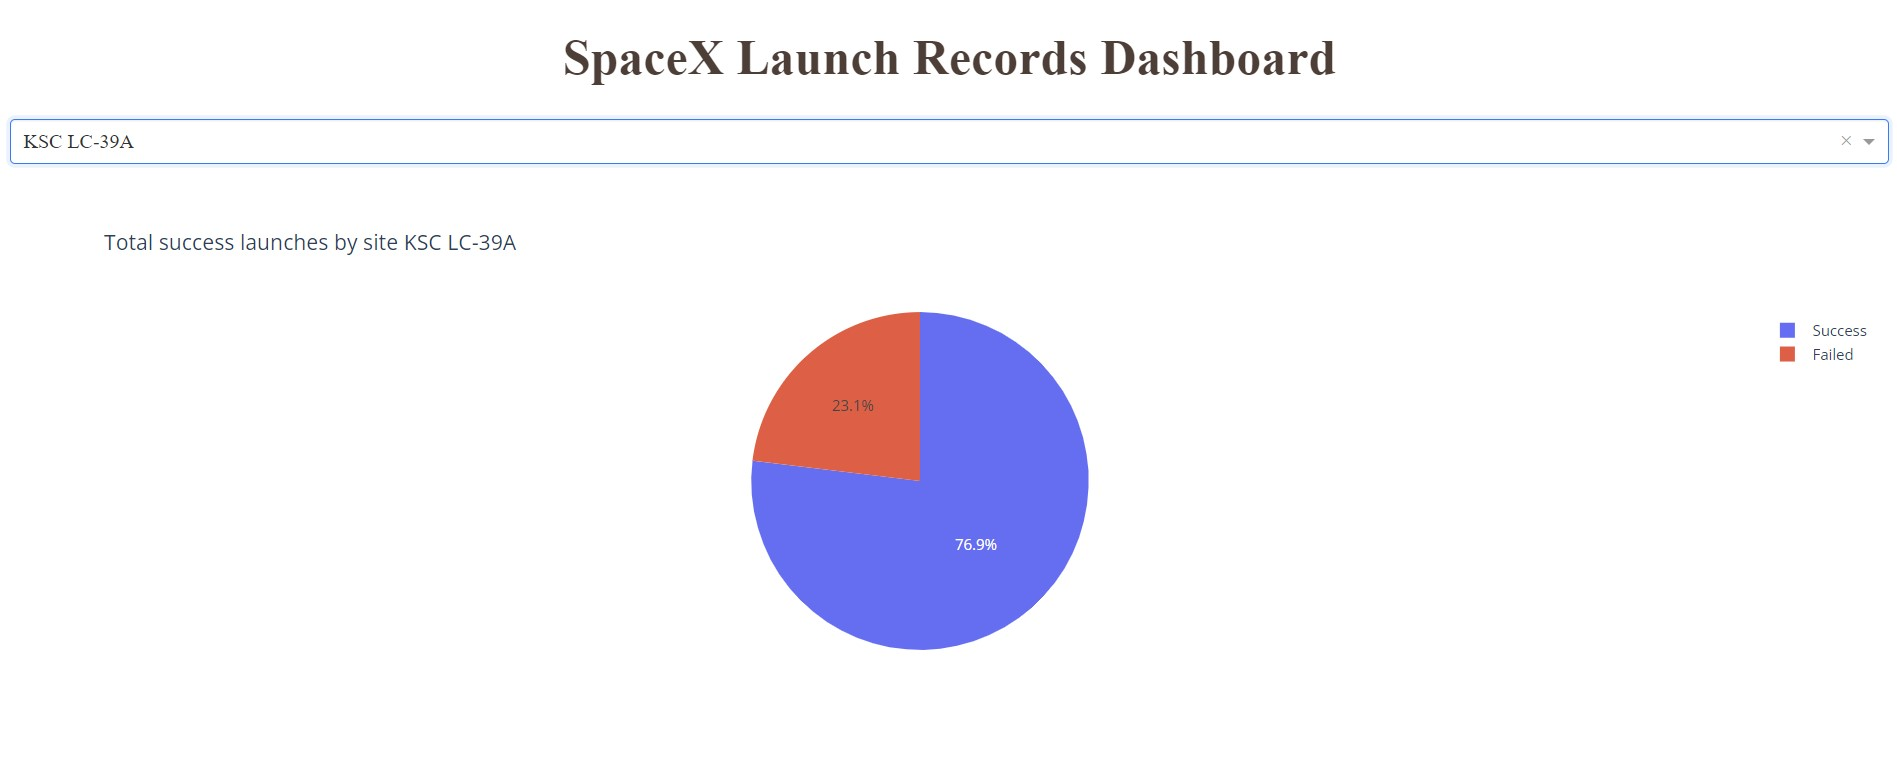

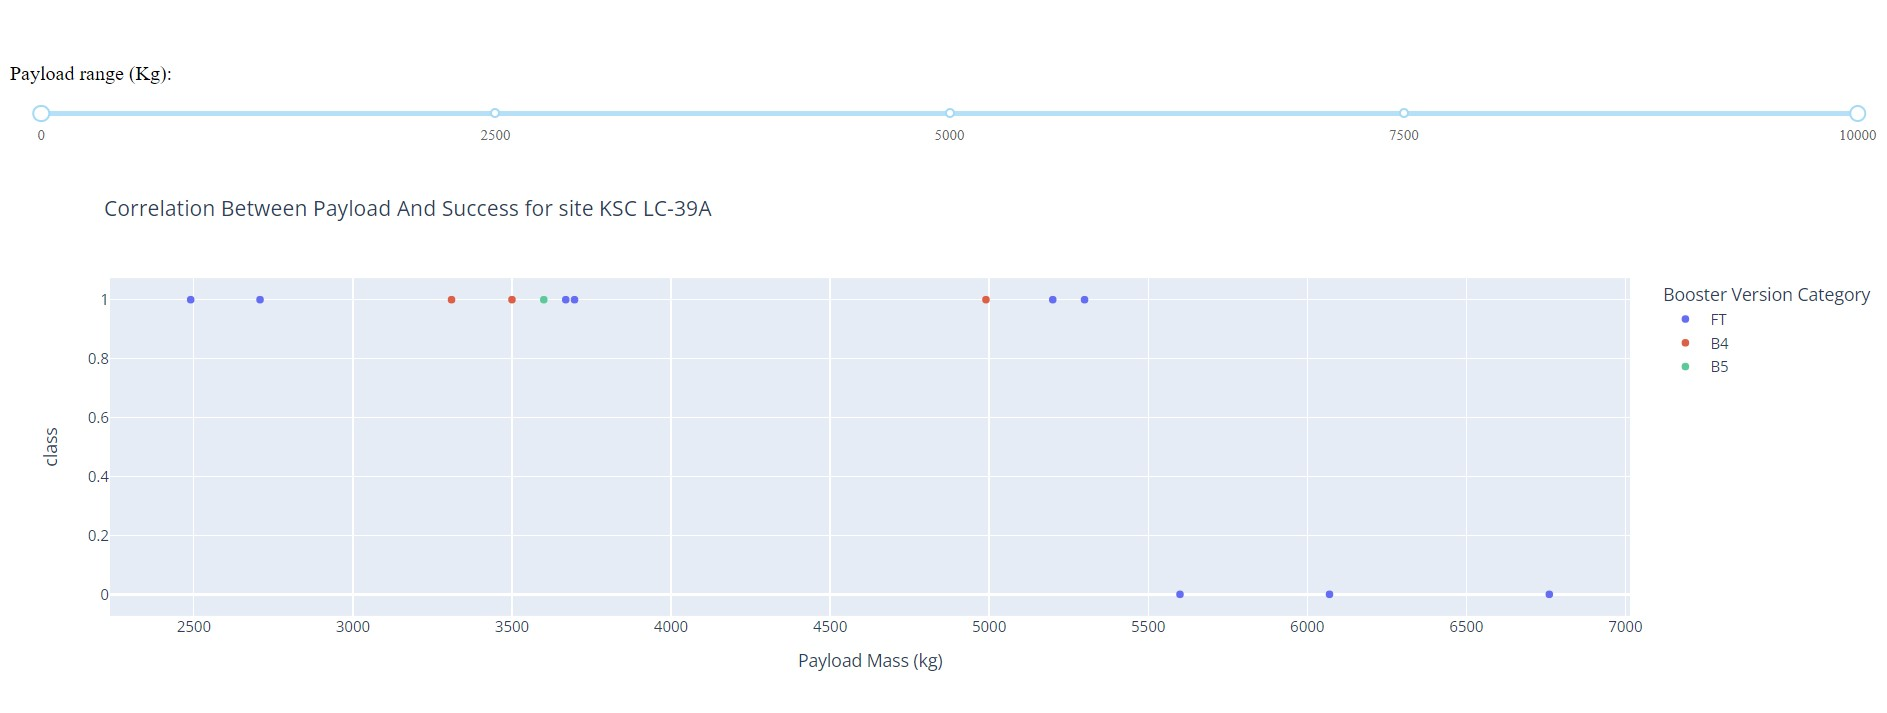

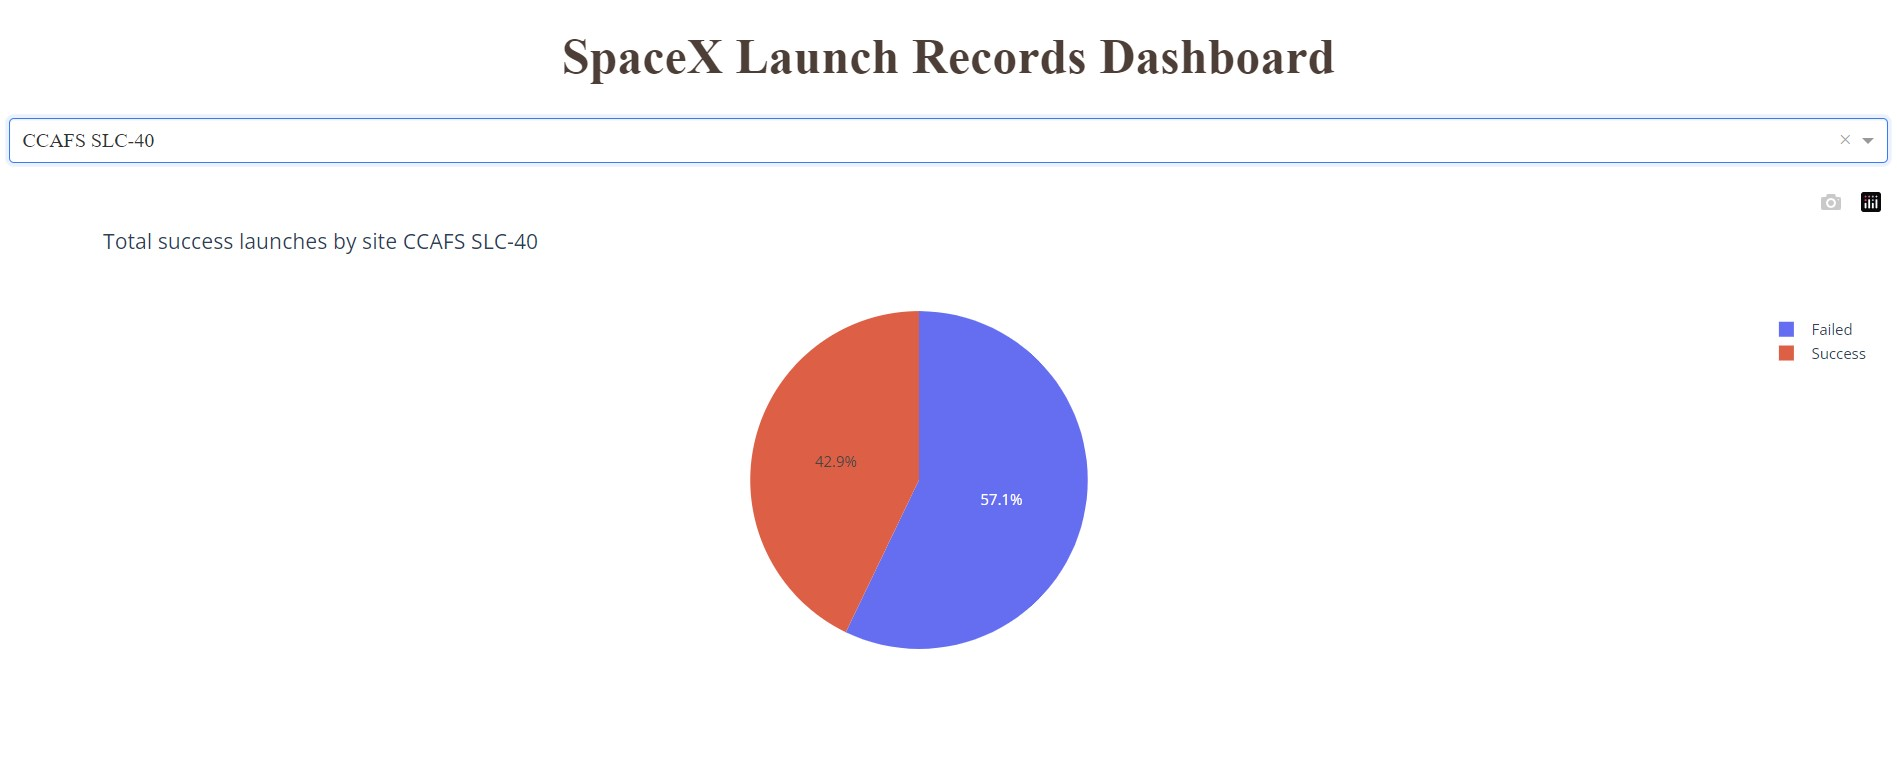

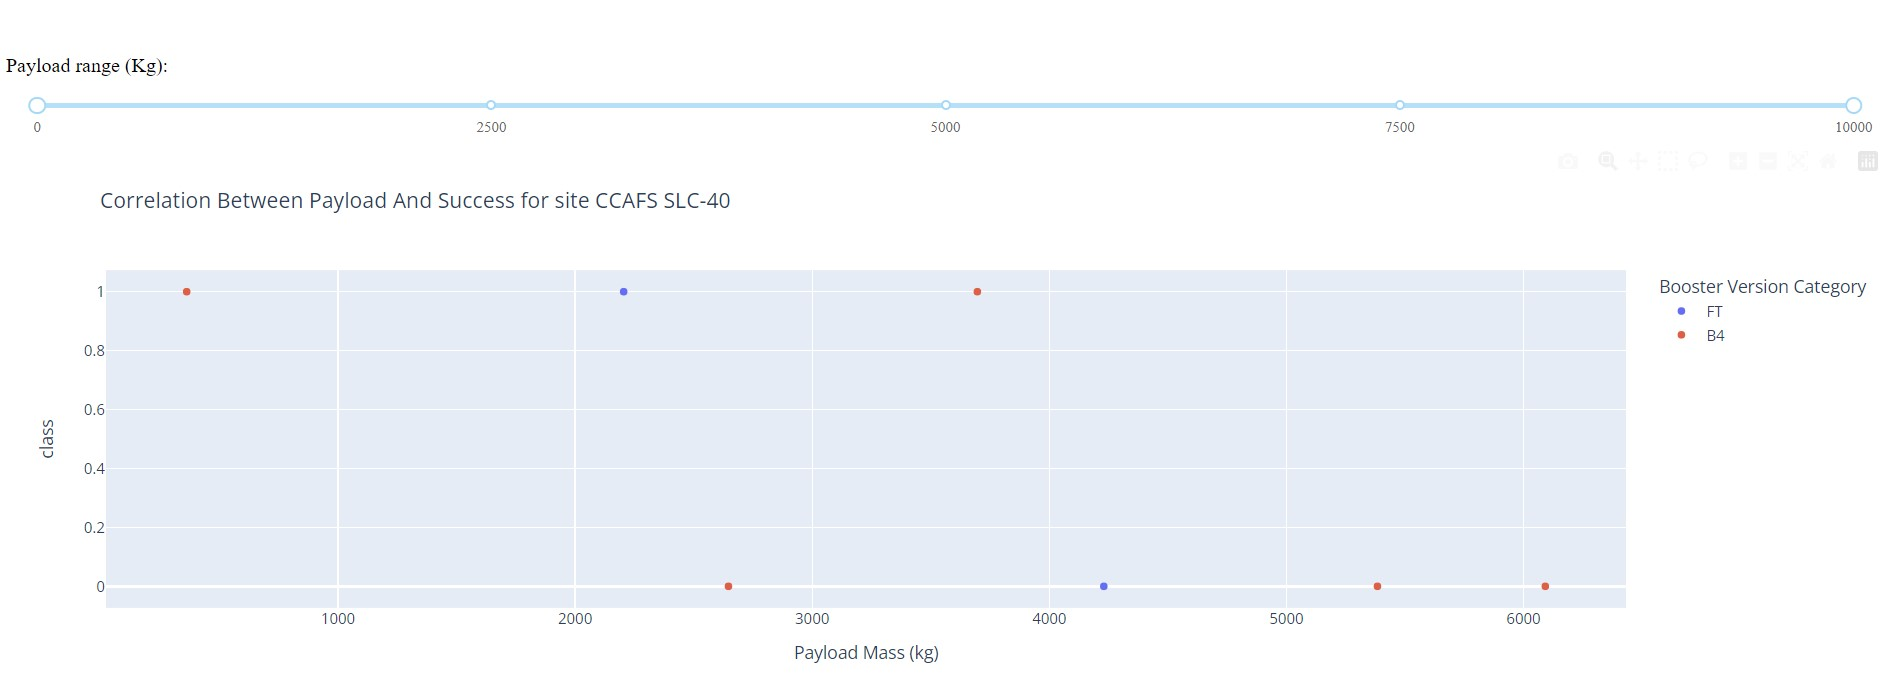